# import data JSON

Import data json disini menggunakan pandas,yaitu read_json()

In [1]:
import pandas as pd
import json

In [2]:
with open('../dataset/tensi.json', 'r') as f:
    data = json.load(f)

In [3]:
data

[{'kategori': 'kabar_baik',
  'pertanyaan': ['baik',
   'baik-baik saja',
   'sangat baik',
   'aku baik',
   'aku baik-baik saja',
   'aku merasa baik',
   'Kabar saya baik',
   'Kabar saya baik-baik saja',
   'Saya merasa sangat baik',
   'Saya sehat-sehat saja',
   'Saya merasa baik-baik saja, terima kasih',
   'Alhamdulillah, kabar saya baik',
   'Kabar saya cukup baik',
   'Saya dalam keadaan baik',
   'Saya merasa baik dan sehat',
   'sehat',
   'sangat sehat',
   'aku merasa sehat',
   'Saya merasa sangat sehat',
   'Alhamdulillah, saya dalam keadaan sehat',
   'Kabar saya baik-baik saja, dan kesehatan saya juga baik-baik saja',
   'Saya dalam kondisi sehat',
   'Saya merasa sehat dan bugar',
   'Kondisi kesehatan saya cukup baik',
   'Saya merasa sehat dan kuat',
   'Lagi oke-oke aja nih kak',
   'tidak enak badan',
   'kurang enak badan',
   'sakit',
   'tidak sehat',
   'aku sedang tidak sehat',
   'aku kurang sehat',
   'tidak baik',
   'tidak enak badan',
   'kurang baik'],

In [4]:
print(data)

[{'kategori': 'kabar_baik', 'pertanyaan': ['baik', 'baik-baik saja', 'sangat baik', 'aku baik', 'aku baik-baik saja', 'aku merasa baik', 'Kabar saya baik', 'Kabar saya baik-baik saja', 'Saya merasa sangat baik', 'Saya sehat-sehat saja', 'Saya merasa baik-baik saja, terima kasih', 'Alhamdulillah, kabar saya baik', 'Kabar saya cukup baik', 'Saya dalam keadaan baik', 'Saya merasa baik dan sehat', 'sehat', 'sangat sehat', 'aku merasa sehat', 'Saya merasa sangat sehat', 'Alhamdulillah, saya dalam keadaan sehat', 'Kabar saya baik-baik saja, dan kesehatan saya juga baik-baik saja', 'Saya dalam kondisi sehat', 'Saya merasa sehat dan bugar', 'Kondisi kesehatan saya cukup baik', 'Saya merasa sehat dan kuat', 'Lagi oke-oke aja nih kak', 'tidak enak badan', 'kurang enak badan', 'sakit', 'tidak sehat', 'aku sedang tidak sehat', 'aku kurang sehat', 'tidak baik', 'tidak enak badan', 'kurang baik'], 'jawaban': 'apa ada yang ingin kamu tanyakan atau lakukan?, tanyakan saja ya kepada aku tensibot'}, {'k

# Mengubah data JSON ke dalam bentuk DataFrame

Mengubah data json kedalam bentuk DataFrame 

Dataframe merupakan data yang berbentuk tabel

In [5]:
kategori = []
pertanyaan = []
jawaban={}
for intent in data:
    jawaban[intent['kategori']]=intent['jawaban']
    for lines in intent['pertanyaan']:
        pertanyaan.append(lines)
        kategori.append(intent['kategori'])

In [6]:
df = pd.DataFrame({"kategori":kategori, "pertanyaan":pertanyaan})

In [7]:
#menampilkan dataframe
df

,kategori,pertanyaan
0,kabar_baik,baik
1,kabar_baik,baik-baik saja
2,kabar_baik,sangat baik
3,kabar_baik,aku baik
4,kabar_baik,aku baik-baik saja
...,...,...
705,efek_Amlodipine,Tolong jelaskan efek samping yang terkait deng...
706,efek_Amlodipine,Apa efek negatif yang mungkin muncul akibat am...
707,efek_Amlodipine,Saya belum mengetahui efek samping apa yang da...
708,efek_Amlodipine,Efek samping apa yang umum terjadi setelah men...


# Preprocessing Data

In [8]:
import re
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## Remove Punctuation

Remove punctuation berfungsi untuk menghilangkan tanda baca yang terdapat di dalam kalimat

Ex: "Siapa yang membuat tensibot?" ==> "Siapa yang membuat tensbot"

dari contoh yang ada dapat kita lihat bahwa tanda baca menjadi hilang

In [9]:
separator = '|'
hapus_tandabaca = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'
delete =str.maketrans(dict.fromkeys(hapus_tandabaca,''))

In [10]:
df['pertanyaan'] = separator \
    .join(df['pertanyaan'].tolist()) \
    .translate(delete) \
    .split(separator)

In [11]:
#Menampilkan data pertanyaaan yang telah di remove tanda baca
print(df['pertanyaan'])

0                                                   baik
1                                          baikbaik saja
2                                            sangat baik
3                                               aku baik
4                                      aku baikbaik saja
                             ...                        
705    Tolong jelaskan efek samping yang terkait deng...
706    Apa efek negatif yang mungkin muncul akibat am...
707    Saya belum mengetahui efek samping apa yang da...
708    Efek samping apa yang umum terjadi setelah men...
709    Mohon beri saya informasi mengenai efek sampin...
Name: pertanyaan, Length: 710, dtype: object


## Stemming

Stemming berfungsi untuk mengubah suatu kata menjadi kata dasar. 

Ex: "Memakan" ==> "Makan"

dapat kita lihat dari contoh dimana kata "Memakan" menjadi kata dasarnya yaitu "Makan". proses stemming disini menggunakan sastrawi

In [12]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Melakukan lemmatization pada setiap baris di kolom 'question', 
df['pertanyaan'] = df['pertanyaan'].apply(lambda x: stemmer.stem(x))

In [13]:
# Menampilkan data yang telah di stemming menggunakan sastrawi
print(df['pertanyaan'])

0                                                   baik
1                                          baikbaik saja
2                                            sangat baik
3                                               aku baik
4                                      aku baikbaik saja
                             ...                        
705    tolong jelas efek samping yang kait dengan gun...
706    apa efek negatif yang mungkin muncul akibat am...
707    saya belum tahu efek samping apa yang dapat ja...
708    efek samping apa yang umum jadi telah konsumsi...
709    mohon beri saya informasi kena efek samping am...
Name: pertanyaan, Length: 710, dtype: object


## Stopword

In [14]:
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# # Membuat objek stopword remover
# factory = StopWordRemoverFactory()
# stopword = factory.create_stop_word_remover()

# # Menghilangkan stopwords dari setiap baris teks
# df['pertanyaan'] = df['pertanyaan'].apply(lambda x: stopword.remove(x))

In [15]:
# # Menampilkan hasil data setelah di stopword
# print(df['pertanyaan'].head(50))

## Tokenizing

In [16]:
# Membuat fungsi tokenize untuk melakukan proses tokenizing menggunakan regex
def tokenize(questions):
    # Menggunakan \w+ untuk mencocokkan semua kecocokan karakter huruf 
    #dan angka, yang diinterpretasikan sebagai kata-kata
    tokens = re.findall(r'\w+', questions)
    return tokens

# Menerapkan fungsi tokenisasi ke setiap baris teks dalam kolom questions
df['pertanyaan'] = df['pertanyaan'].apply(tokenize)

In [17]:
vocabs = []

for x in df.pertanyaan:
    for y in x:
        vocabs.append(y)

In [18]:
len(vocabs)

3835

In [19]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [20]:
vocabs = unique(vocabs)

In [21]:
len(vocabs)

320

In [22]:
# menampilkan data yang telah di tokenizing
print(vocabs)

['baik', 'baikbaik', 'saja', 'sangat', 'aku', 'rasa', 'kabar', 'saya', 'sehatsehat', 'terima', 'kasih', 'alhamdulillah', 'cukup', 'dalam', 'ada', 'dan', 'sehat', 'juga', 'kondisi', 'bugar', 'kuat', 'lagi', 'okeoke', 'aja', 'nih', 'kak', 'tidak', 'enak', 'badan', 'kurang', 'sakit', 'sedang', 'ku', 'asa', 'saat', 'ini', 'untuk', 'akhirakhir', 'siapa', 'yang', 'buat', 'tensibot', 'cipta', 'bikin', 'ngebikin', 'kembang', 'oleh', 'ingin', 'tahu', 'penasaran', 'ya', 'sih', 'chatbot', 'itu', 'ni', 'ken', 'dong', 'banget', 'sapa', 'kalo', 'boleh', 'suka', 'kamu', 'apa', 'sebut', 'defenisi', 'dari', 'tensibo', 'maksud', 'dengan', 'adalah', 'fungsi', 'kenalin', 'manfaat', 'tenibot', 'jelasin', 'jelas', 'tesibot', 'apasih', 'robot', 'bingung', 'seperti', 'hipertensi', 'arti', 'bagaimana', 'erti', 'cara', 'umum', 'sebenernya', 'yaa', 'tuh', 'mengehtahui', 'coba', 'mau', 'tau', 'hmm', 'tensbot', 'kena', 'gejala', 'hieprtensi', 'apatuh', 'gimana', 'idap', 'tandatanda', 'orang', 'bisa', 'jadi', 'tand

# MODEL

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
pip update counvectorizer

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "update"



## Mengubah data Hasil Tokenize Kedalam Bentuk Numerik

In [25]:
#Membuat objek CountVectorizer
vectorizer = CountVectorizer()

#Mengubah data tokenized menjadi bentuk numerik dengan menggunakan fit_transform
data_numerik = vectorizer.fit_transform(df['pertanyaan'].apply(lambda x: " ".join(x)))

#  Membuat dataframe baru yang berisi data numerik
x = pd.DataFrame(data_numerik.toarray(), columns=vectorizer.get_feature_names_out())


In [26]:
# Menampilkan hasil Data Numerik
x

,ada,adalah,agar,ah,air,aja,akhir,akhirakhir,akibat,aktif,...,untuk,up,usah,utama,wah,wajar,waspada,ya,yaa,yang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
706,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
tensibot = x['tensibot']

tensibot [89:]

89     2
90     0
91     0
92     1
93     0
      ..
705    0
706    0
707    0
708    0
709    0
Name: tensibot, Length: 621, dtype: int64

In [28]:
x['tinggal']

0      0
1      0
2      0
3      0
4      0
      ..
705    0
706    0
707    0
708    0
709    0
Name: tinggal, Length: 710, dtype: int64

In [29]:
# mencari index dengan kata yang memiliki nilai == 1
index = []
n =  x['tensibot']
for i in range(len(x)):
    if n[i] == 1 or n[i] == 2:
        index.append(i)

In [30]:
# Menampilkan index data pertanyaan dengan kata "tensibot"
index[:25]

[63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 81,
 84,
 85,
 86,
 87,
 88,
 89,
 92,
 94]

##  Naive Bayes

In [31]:
# Membuat objek MultinomialNB
model = MultinomialNB()

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data_numerik, df['kategori'], test_size=0.2)

In [32]:
# Melatih model dengan data latih
model.fit(X_train, y_train)
#Menguji model dengan data uji
y_pred = model.predict(X_test)

In [33]:
# Menampilkan hasil akurasi
print("Akurasi model: ", accuracy_score(y_test, y_pred))

Akurasi model:  0.8309859154929577


## Visualisasi

<AxesSubplot:>

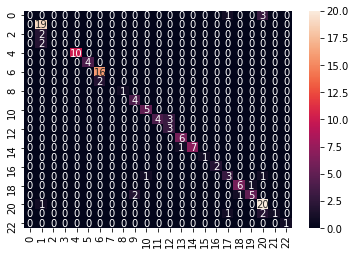

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menyajikan confusion matrix dalam bentuk heatmap
sns.heatmap(cm, annot=True, fmt='d')

In [35]:
from sklearn.metrics import classification_report

# Menyajikan classification report
print(classification_report(y_test, y_pred))

                                     precision    recall  f1-score   support

                Penjelasan_Catopril       0.00      0.00      0.00         4
         before_konsumsi_Amlodipine       0.79      1.00      0.88        19
           before_konsumsi_Catopril       0.00      0.00      0.00         2
before_konsumsi_Hydrochlorothiazide       0.00      0.00      0.00         2
                                bye       1.00      1.00      1.00        10
                  cek_tekanan_darah       1.00      1.00      1.00         4
                    efek_Amlodipine       0.89      1.00      0.94        16
                     efek_Captopril       0.00      0.00      0.00         2
             efek_Hidroclorthiazide       1.00      1.00      1.00         1
                             gejala       0.67      1.00      0.80         4
                  info_dev_tensibot       0.83      1.00      0.91         5
             info_gejala_hipertensi       1.00      0.57      0.73         

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Uji Coba Model

In [36]:
# Menentukan input yang akan diuji
test_question = "tensibot"

# Melakukan preprocessing pada input yang akan diuji
test_question = tokenize(test_question)
test_question = [stemmer.stem(i) for i in test_question]
test_question = [i.lower() for i in test_question]

# Mengubah input yang akan diuji menjadi bentuk yang dapat digunakan oleh algoritma Multinomial Naive Bayes
test_question = vectorizer.transform([' '.join(test_question)])
print(test_question)

# Mengklasifikasikan input berdasarkan model yang telah dibuat
prediction = model.predict(test_question)

# Menampilkan hasil klasifikasi
print("Hasil klasifikasi: ", prediction[0])

  (0, 289)	1
Hasil klasifikasi:  info_tensibot


# Uji Coba Chatbot

In [37]:
# #Membuat dictionary untuk menyimpan jawaban sesuai dengan kategori
# jawaban_dict = {}

# #Mengambil semua kategori yang ada dalam data
# categories = df['kategori'].unique()

# #Melakukan perulangan untuk setiap kategori
# for category in categories:
#     # Mengambil jawaban yang sesuai dengan kategori yang sedang diperiksa
#     jawaban = df[df['kategori'] == category]['jawaban'].values
#     # Menambahkan jawaban ke dalam dictionary dengan kategori sebagai key
#     jawaban_dict[category] = jawaban

In [38]:
def import_json(file_name):
    with open(file_name, 'r') as file:
        content = json.load(file)
    return content

hipertensi_derajat1 =import_json('dataset/hipertensi_derajat1.json')
hipertensi_derajat2 =import_json('dataset/hipertensi_derajat2.json')
hipertensi_derajat3 =import_json('dataset/hipertensi_derajat3.json')
hipertensi_terisolisasi =import_json('dataset/hipertensi_terisolisasi.json')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/hipertensi_derajat1.json'

In [ ]:
def chatbot():
    print("Tensibot: Hai aku tensibot, gimana kabar kakak hari ini?")
    sudah = ['sudah','suda','sdh','dah','sudh','sdah','udah']
    belum = ['belum', 'belu', 'blm', 'belm', 'blum', 'lum']
    ingin = ['iya ingin', 'ya ingin', 'y ingin', 'iya ingn', 'ya ingn', 'y ingn']
    exit = True
    exit2 = True
    while exit:   
        # Mengambil input dari user
        pertanyaan = input("You: ").lower()
        # Menampilkan jawaban dari chatbot
        # Menambahkan opsi untuk keluar dari chatbot
        if pertanyaan in ingin:
            while exit2:
                print("Tensibot: Tensibot mau nanya ni berapa sistolik kakak?")
                sistolik = int(input("You:  "))
                print ("Tensibot: Tensibot mau nanya ni berapa Diastolik kakak?")
                diastolik = int(input("You:  "))
                if sistolik >= 120 and sistolik <= 129 or diastolik >=80 and diastolik <=84:
                    print("Tensibot: Wah Tekanan darah sistolik kakak "+str(sistolik)+" dan diastolik "+str(diastolik)+".\nKakak memiliki tekanan darah normal")
                    exit2 = False
                elif sistolik >=130 and sistolik <= 139 or diastolik >=84 and diastolik <=89:
                    print("Wah Tekanan darah sistolik kakak "+str(sistolik)+" dan diastolik "+str(diastolik)+".\nKakak memiliki tekanan darah tinggi normal tetap jaga kesehatan Ya..")
                    exit2 = False
                elif sistolik >=140 and sistolik <= 149 or diastolik >=90 and diastolik <= 99:
                    print("Tensibot: Wah Tekanan darah sistolik kakak "+str(sistolik)+" dan diastolik "+str(diastolik)+" kakak mengalami Hipertensi derajat 1. \nApakah sudah tahu cara pananganannya?(sudah/belum)")
                    pt = input("You: ").lower()
                    if pt in belum:
                        print("Tensibot: "+hipertensi_derajat1)
                        exit2 = False
                    elif pt in sudah:
                        print("Tensibot: Waah Bagus sekali kak. Kalau kakak bingung boleh tanya-tanya ke aku lagi ya")
                        exit2 = False
                    else:
                        print(f"Tensibot: Maaf ka aku ga ngerti {pt} maksudnya apa?")
                elif sistolik >=160  and sistolik <=179 or diastolik >=100 and diastolik <= 109:
                    print("Tensibot: Wah Tekanan darah sistolik kakak "+str(sistolik)+" dan diastolik "+str(diastolik)+" kakak mengalami Hipertensi derajat 2. \nApakah sudah tahu cara pananganannya?(sudah/belum)")
                    pt = input("You: ").lower()
                    if pt in belum:
                        print("Tensibot: "+hipertensi_derajat2)
                        exit2 = False
                    elif pt in sudah:
                            print("Tensibot: Waah Bagus sekali kak. Kalau kakak bingung boleh tanya-tanya ke aku lagi ya")
                            exit2 = False
                    else:
                        print(f"Tensibot: Maaf ka aku ga ngerti {pt} maksudnya apa?")
                elif sistolik >=180 and diastolik >=110:
                    print("Tensibot: Wah Tekanan darah sistolik kakak "+str(sistolik)+" dan diastolik "+str(diastolik)+" kakak mengalami Hipertensi derajat 3. \nApakah sudah tahu cara pananganannya?(sudah/belum)")
                    pt = input("You: ").lower()
                    if pt in belum:
                        print("Tensibot: "+hipertensi_derajat3)
                        exit2 = False
                    elif pt in sudah:
                            print("Tensibot: Waah Bagus sekali kak. Kalau kakak bingung boleh tanya-tanya ke aku lagi ya")
                            exit2 = False
                    else:
                        print(f"Tensibot: Maaf ka aku ga ngerti {pt} maksudnya apa?")
                elif sistolik >= 140 and diastolik < 90:
                    print("Tensibot: Wah Tekanan darah sistolik kakak "+str(sistolik)+" dan diastolik "+str(diastolik)+" kakak mengalami Hipertensi terisolasi. \nApakah sudah tahu cara pananganannya?(sudah/belum)")
                    pt = input("You: ").lower()
                    if pertanyaan in belum:
                        print("Tensibot: "+hipertensi_terisolisasi)
                        exit2 = False
                    elif pertanyaan in sudah:
                            print("Tensibot: Waah Bagus sekali kak. Kalau kakak bingung boleh tanya-tanya ke aku lagi ya")
                            exit2 = False
                    else:
                        print(f"Tensibot: Maaf ka aku ga ngerti {pt} maksudnya apa?")
                
        else:
            # Melakukan preprocessing pada input yang akan diuji
            pertanyaan = tokenize(pertanyaan)
            pertanyaan = [stemmer.stem(i) for i in pertanyaan]
            pertanyaan = [i.lower() for i in pertanyaan]

            # Mengubah input yang akan diuji menjadi bentuk yang dapat digunakan oleh algoritma Multinomial Naive Bayes
            pertanyaan = vectorizer.transform([' '.join(pertanyaan)])

            # Mengklasifikasikan input berdasarkan model yang telah dibuat
            prediction = model.predict(pertanyaan)

            # Mengambil jawaban yang sesuai dengan kategori yang dihasilkan dari prediksi
            answer = jawaban[prediction[0]]

            print("Tensibot: " + answer)
            if answer == "iya kaka, semoga apa yang diberikan tensibot bermanfaat ya buat kamu. kalau masih bingung kaka boleh tanya lagi sama tensibot seputar hipertensi":
                exit = False


In [ ]:
chatbot()